In [1]:
import numpy as np
import librosa
import glob
import os

In [2]:
import pandas as pd
import traceback

In [3]:
import sys, os

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from MetaCreate import MetaCreate
from AudioManipulator import AudioManipulator

In [23]:
meta=MetaCreate()
meta_data=meta.generate_meta_data()

In [24]:
meta.meta_to_json('../artifacts/meta.json')

In [9]:
meta_data=pd.read_json('../artifacts/meta.json')

In [4]:
import librosa.display

In [27]:
meta_data.iloc[1].path

'..\\data\\train\\wav\\SWH-05-20101106\\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101.wav'

In [49]:
from AudioManipulator import AudioManipulator

In [50]:
audiopath=meta_data.iloc[5].path
audio3, sr=librosa.load(audiopath,sr=None,mono=False)

In [51]:
manipulator=AudioManipulator(audio3,16000)

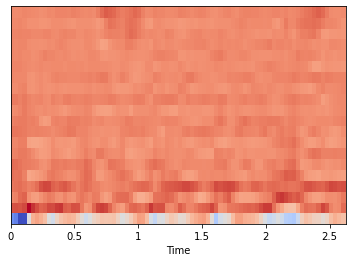

In [54]:
librosa.display.specshow(manipulator.generate_MFCC(), sr=sr, x_axis='time',cmap="coolwarm")

In [55]:
pitched=manipulator.pitch(-2)

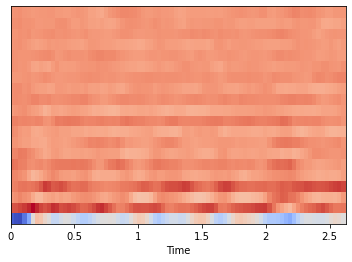

In [56]:
librosa.display.specshow(manipulator.generate_MFCC(), sr=sr, x_axis='time',cmap="coolwarm")

In [57]:
manipulator.pad(58400)

array([0.0053391 , 0.00542398, 0.00715619, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

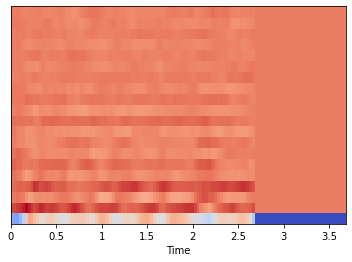

In [58]:
librosa.display.specshow(manipulator.generate_MFCC(), sr=sr, x_axis='time',cmap="coolwarm")

In [59]:
manipulator.audio.shape

(58400,)

In [64]:
manipulator.shift_to(2,'right')

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

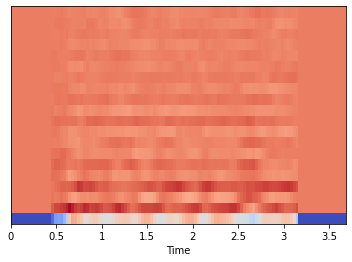

In [65]:
librosa.display.specshow(manipulator.generate_MFCC(), sr=sr, x_axis='time',cmap="coolwarm")

In [52]:

ipd.Audio(manipulator.audio, rate=manipulator.sr)

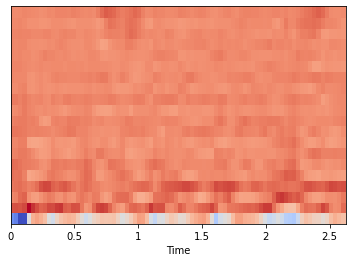

In [53]:
librosa.display.specshow(manipulator.generate_MFCC(), sr=sr, x_axis='time',cmap="coolwarm")

In [13]:
import IPython.display as ipd
audiopath=meta_data.iloc[1].path
audio, sr=librosa.load(audiopath,sr=None,mono=False)

ipd.Audio(audio, rate=sr)
# print(audio.shape)

In [33]:
import numpy as np

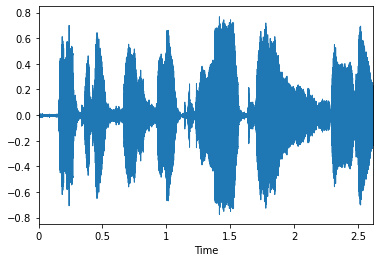

In [114]:

librosa.display.waveplot(audio3, sr=sr)

In [4]:
supported = """a b c d 
e f g h
i j k l
m n o p
q r s t
u v w x 
y z
""".split()

char_map = {}
char_map[""] = 0
char_map["<SPACE>"] = 1
index = 2
for c in supported:
    char_map[c] = index
    index += 1
index_map = {v+1: k for k, v in char_map.items()}

In [5]:
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            # print("checking character " + c + " in map:")
            # print(char_map)
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence

In [6]:
def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    for c in int_sequence:
        ch = index_map[c]
        text.append(ch)
    return text

In [ ]:
class DataGenerator():
    def __init__(self, train_corpus,valid_corpus,   mfcc_dim=26,minibatch_size=20):
        
        self.train_corpus = train_corpus
        self.valid_corpus = valid_corpus
        self.mfcc_dim = mfcc_dim
        self.feats_mean = np.zeros((self.feat_dim,))
        self.feats_std = np.ones((self.feat_dim,))
        # self.rng = random.Random(RNG_SEED)
        self.cur_train_index = 0
        self.cur_valid_index = 0
        self.cur_test_index = 0
        self.minibatch_size = minibatch_size
    def get_batch(self, partition):
        if partition == 'train':
            audio_paths = self.train_audio_paths
            cur_index = self.cur_train_index
            texts = self.train_texts
        elif partition == 'valid':
            audio_paths = self.valid_audio_paths
            cur_index = self.cur_valid_index
            texts = self.valid_texts
        elif partition == 'test':
            audio_paths = self.test_audio_paths
            cur_index = self.test_valid_index
            texts = self.test_texts
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")
        
        features = [self.normalize(self.featurize(a)) for a in 
            audio_paths[cur_index:cur_index+self.minibatch_size]]
            max_length = max([features[i].shape[0] 
            for i in range(0, self.minibatch_size)])

        max_string_length = max([len(texts[cur_index+i]) 
            for i in range(0, self.minibatch_size)])
        
        # initialize the arrays
        X_data = np.zeros([self.minibatch_size, max_length,self.mfcc_dim])
        labels = np.ones([self.minibatch_size, max_string_length]) * 28
        input_length = np.zeros([self.minibatch_size, 1])
        label_length = np.zeros([self.minibatch_size, 1])
        
        for i in range(0, self.minibatch_size):
            # calculate X_data & input_length
            feat = features[i]
            input_length[i] = feat.shape[0]
            X_data[i, :feat.shape[0], :] = feat

            # calculate labels & label_length
            label = np.array(text_to_int_sequence(texts[cur_index+i])) 
            labels[i, :len(label)] = label
            label_length[i] = len(label)
 
        # return the arrays
        outputs = {'ctc': np.zeros([self.minibatch_size])}
        inputs = {'the_input': X_data, 
                  'the_labels': labels, 
                  'input_length': input_length, 
                  'label_length': label_length 
                 }
        return (inputs, outputs)
        
    def featurize(self, audio_clip):
        """ For a given audio clip, calculate the corresponding feature
        Params:
            audio_clip (str): Path to the audio clip
        """
        if self.spectrogram:
            return spectrogram_from_file(
                audio_clip, step=self.step, window=self.window,
                max_freq=self.max_freq)
        else:
            (rate, sig) = wav.read(audio_clip)
            return mfcc(sig, rate, numcep=self.mfcc_dim)
    

In [24]:
meta_data.describe()

,sample_rate,channels,duration
count,10179.0,10179.0,10179.000000
mean,16000.0,1.0,3.504881
std,0.0,0.0,1.025019
min,16000.0,1.0,2.159750
25%,16000.0,1.0,2.650000
50%,16000.0,1.0,3.279937
75%,16000.0,1.0,4.179969
max,16000.0,1.0,6.150000


In [7]:
import math 

All Audio Files should be padded to 98400

In [8]:
print(meta_data.columns)

NameError: name 'meta_data' is not defined

In [39]:
def pad_audio_files(paths,size=98400):
    audios=[]
    for i in paths:
        audio_data, sr=librosa.load(i,sr=None,mono=False)
        manipulator=AudioManipulator(audio_data,sr=sr)
        audio_data=manipulator.pad(size)
        audios.append(audio_data)
    return audios

In [12]:
def featurize(audios,sr):
    feautures=[]
    for i in audios:
        manipulator=AudioManipulator(i,sr=sr)
        mfcc=manipulator.generate_MFCC()
        feautures.append(mfcc)
    return feautures

In [13]:
data=data.iloc[:1000]

In [16]:
features=featurize(data["audio"],sr=16000)

In [19]:
data["features"]=features

In [34]:
import numpy as np
import soundfile
import json

import random
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (BatchNormalization, Conv1D, Dense, Input, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM)
    
# from tensorflow.keras.utils.vis_utils import plot_model


import _pickle as pickle
from numpy.lib.stride_tricks import as_strided

from tensorflow.keras.layers import (Input, Lambda)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint   
import os

In [21]:
class Batch():
    def __ini__(self,features,feature_valid,texts,texts_valid,batch_size):
        self.barch_size=batch_size
        self.features=features
        self.current_index=0
        self.current_valid_index=0
        self.texts=texts
        self.features_valid=feature_valid
        self.texts_valid=texts_valid
    def getBatch(self,partition):
        if partition == 'train':
            feautre_list = self.features
            cur_index = self.current_index
            texts = self.train_texts
        elif partition == 'valid':
            feautre_list = self.features_valid
            cur_index = self.current_valid_index
            texts = self.texts_valid
        else:
            raise Exception("Invalid partition. "
                "Must be train/validation")
                
        features=feautre_list[cur_index:cur_index+self.minibatch_size]
        texts=texts[cur_index:cur_index+self.minibatch_size]
        max_length = max([features[i].shape[0] 
            for i in range(0, self.minibatch_size)])
        max_string_length = max([len(texts[fit_train+i]) 
            for i in range(0, self.minibatch_size)])
        
        # initialize the arrays
        X_data = np.zeros([self.minibatch_size, max_length, 26])
        labels = np.ones([self.minibatch_size, max_string_length]) * 28
        input_length = np.zeros([self.minibatch_size, 1])
        label_length = np.zeros([self.minibatch_size, 1])
        
        for i in range(0, self.minibatch_size):
            # calculate X_data & input_length
            feat = features[i]
            input_length[i] = feat.shape[0]
            X_data[i, :feat.shape[0], :] = feat

            # calculate labels & label_length
            label = np.array(text_to_int_sequence(texts[self.cur_index+i])) 
            labels[i, :len(label)] = label
            label_length[i] = len(label)
            outputs = {'ctc': np.zeros([self.minibatch_size])}
            inputs = {'the_input': X_data, 
                    'the_labels': labels, 
                    'input_length': input_length, 
                    'label_length': label_length 
                    }
            return (inputs, outputs)

    def next_train(self):
        while True:
            ret = self.get_batch()
            self.cur_train_index += self.minibatch_size
            if self.cur_train_index >= len(self.train_texts) - self.minibatch_size:
                self.cur_train_index = 0
                self.suffle()
            yield ret 

    def next_valid(self):
        """ Obtain a batch of validation data
        """
        while True:
            ret = self.get_batch('valid')
            self.cur_valid_index += self.minibatch_size
            if self.cur_valid_index >= len(self.valid_texts) - self.minibatch_size:
                self.cur_valid_index = 0
                # self.shuffle_data_by_partition('valid')
            yield ret
        
    def shuffle_data(features, durations, texts):
        """ Shuffle the data (called after making a complete pass through 
            training or validation data during the training process)
        Params:
            audio_paths (list): Paths to audio clips
            durations (list): Durations of utterances for each audio clip
            texts (list): Sentences uttered in each audio clip
        """
        p = np.random.permutation(len(self.features))
        self.features = [self.features[i] for i in p] 
        self.texts = [self.texts[i] for i in p]
        # return audio_paths, durations, texts

In [35]:
def model_1(input_dim, units, activation, output_dim=29):
    """ Build a recurrent network for speech 
    """
    # Main acoustic input
    input_data = Input(name='the_input', shape=(None, input_dim))
    # Add recurrent layer
    simp_rnn = GRU(units, activation=activation,
        return_sequences=True, implementation=2, name='rnn')(input_data)
    # TODO: Add batch normalization 
    bn_rnn = BatchNormalization()(simp_rnn)
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn)
    # Add softmax activation layer
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    plot_model(model, to_file='models/model_1.png')
    return model

In [36]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [37]:
def add_ctc_loss(input_to_softmax):
    the_labels = Input(name='the_labels', shape=(None,), dtype='float32')
    input_lengths = Input(name='input_length', shape=(1,), dtype='int64')
    label_lengths = Input(name='label_length', shape=(1,), dtype='int64')
    output_lengths = Lambda(input_to_softmax.output_length)(input_lengths)
    # CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')(
        [input_to_softmax.output, the_labels, output_lengths, label_lengths])
    model = Model(
        inputs=[input_to_softmax.input, the_labels, input_lengths, label_lengths], 
        outputs=loss_out)
    return model

In [38]:
def train(audio_gen,
          input_to_softmax, 
          model_name,
          minibatch_size=20,
          optimizer=SGD(learning_rate=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5),
          epochs=20,
          verbose=1):    
    # calculate steps_per_epoch
    num_train_examples=len(audio_gen.train_audio_paths)
    steps_per_epoch = num_train_examples//minibatch_size
    # calculate validation_steps
    num_valid_samples = len(audio_gen.valid_audio_paths) 
    validation_steps = num_valid_samples//minibatch_size
    
    # add CTC loss to the NN specified in input_to_softmax
    model = add_ctc_loss(input_to_softmax)

    # CTC loss is implemented elsewhere, so use a dummy lambda function for the loss
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

    # make results/ directory, if necessary
    if not os.path.exists('models'):
        os.makedirs('models')

    # add checkpointer
    checkpointer = ModelCheckpoint(filepath='models/'+model_name+'.h5', verbose=0)

    # train the model
    hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,
        epochs=epochs, validation_data=audio_gen.next_valid(), validation_steps=validation_steps,
        callbacks=[checkpointer], verbose=verbose, use_multiprocessing=True)

    # save model loss
    with open('models/'+model_name+'.pickle', 'wb') as f:
        pickle.dump(hist.history, f)

In [56]:

data=meta_data.copy()

In [57]:
data["audio"]=pad_audio_files(data["path"])

In [ ]:
features=featurize(data["audio"],sr=16000)

In [40]:

valid_meta=MetaCreate('../data/test/text','../data/test',separater=" ")
valid_meta_data=valid_meta.generate_meta_data()

In [32]:

valid_meta.meta_to_json("../artifacts/valid_meta.json")

In [41]:
valid_data=valid_meta_data.copy()

In [44]:
valid_meta_data.describe()

,sample_rate,channels,duration
count,1990.0,1990.0,1990.000000
mean,16000.0,1.0,3.333428
std,0.0,0.0,0.970275
min,16000.0,1.0,2.160000
25%,16000.0,1.0,2.550000
50%,16000.0,1.0,3.059969
75%,16000.0,1.0,3.910000
max,16000.0,1.0,6.140000


In [45]:
6.140000 * 16000

98240.0

In [47]:
valid_data["audio"]=pad_audio_files(valid_data["path"],98240)

In [50]:
valid_data["duration"]=valid_data["duration"].max()

In [43]:
valid_features=featurize(valid_data["audio"],sr=16000)

In [51]:
valid_data.describe()

,sample_rate,channels,duration
count,1990.0,1990.0,1.990000e+03
mean,16000.0,1.0,6.140000e+00
std,0.0,0.0,9.505898e-14
min,16000.0,1.0,6.140000e+00
25%,16000.0,1.0,6.140000e+00
50%,16000.0,1.0,6.140000e+00
75%,16000.0,1.0,6.140000e+00
max,16000.0,1.0,6.140000e+00


In [36]:
# for i in meta_data.values:
    # print(math.floor(i[-1] *16000))

In [53]:
TRAIN_CORPUS = "train_corpus.json"
VALID_CORPUS = "valid_corpus.json"

MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 5
MODEL_NAME = "RNN_model"

################ Reminder MINI_BATCH_SIZE=250 
MINI_BATCH_SIZE = 250

SORT_BY_DURATION=False
MAX_DURATION = 10.0
FEATURES_LIST=features

TEXT__LIST=data["text"]

FEATURES_VALID_LIST=valid_features

TEXT_VALID_LIST=valid_data["text"]

audio_gen = Batch(FEATURES_LIST,TEXT_LIST,MINI_BATCH_SIZE)
# add the training data to the generator
# audio_gen.load_train_data()
# audio_gen.load_validation_data()

KeyError: 'features'